In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!mkdir -p data-quality-and-feature-engineering/datasets
!mkdir -p data-quality-and-feature-engineering/notebooks
!mkdir -p data-quality-and-feature-engineering/scripts

In [3]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 46.2MB/s]


In [4]:
!unzip students-performance-in-exams.zip -d data-quality-and-feature-engineering/datasets/

Archive:  students-performance-in-exams.zip
  inflating: data-quality-and-feature-engineering/datasets/StudentsPerformance.csv  


In [5]:
!ls data-quality-and-feature-engineering/datasets

StudentsPerformance.csv


In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(
    "data-quality-and-feature-engineering/datasets/StudentsPerformance.csv"
)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df_missing = df.copy()
df_missing.loc[df_missing.sample(frac=0.1).index, "math score"] = np.nan
df_missing.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,100
reading score,0
writing score,0


In [14]:
mean_value = df_missing["math score"].mean()
df_mean = df_missing.copy()
df_mean["math score"] = df_mean["math score"].fillna(mean_value)
df_mean.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [22]:
median_value = df_missing["math score"].median()
df_median = df_missing.copy()
df_median["math score"] = df_median["math score"].fillna(median_value)
df_median.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [23]:
mode_value = df_missing["math score"].mode()[0]
df_mode = df_missing.copy()
df_mode["math score"] = df_mode["math score"].fillna(mode_value)
df_mode.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


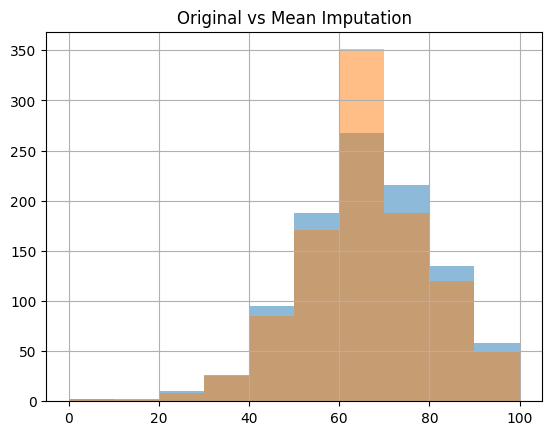

In [24]:
import matplotlib.pyplot as plt

plt.figure()
df["math score"].hist(alpha=0.5)
df_mean["math score"].hist(alpha=0.5)
plt.title("Original vs Mean Imputation")
plt.show()

## Missing Value Handling Observations

- Missing values were artificially introduced to simulate real-world scenarios.
- Mean, median, and mode imputation techniques were applied.
- Mean imputation may slightly affect the distribution by reducing variance.
- Median imputation is more robust to outliers.
- Choice of imputation strategy depends on data distribution and use case.